In [2]:
#Importando librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
#Cargando el dataset

cacao = pd.read_csv(r"C:\Users\boter\OneDrive\Documents\Noveno Semestre\Ciencia de datos II\flavors_of_cacao.csv")

Inicialmente se realizará un análisis rápido del dataset para entender su estructura 

In [54]:
# Me muetsra las primeras columnas 
cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
#Información general de dataset
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
## Dimensión del dataset
cacao.shape

(1795, 9)

In [55]:
#Verificando si existen datos faltantes
(
cacao.isna().sum().reset_index()
    .rename(columns={"index": "variable", 0: "count"})
    .assign(percent = lambda x: 100*x["count"]/cacao.shape[0])
    .sort_values(by="count", ascending=True)
) 

,variable,count,percent
0,Company \n(Maker-if known),0,0.00000
1,Specific Bean Origin\nor Bar Name,0,0.00000
2,REF,0,0.00000
3,Review\nDate,0,0.00000
4,Cocoa\nPercent,0,0.00000
5,Company\nLocation,0,0.00000
6,Rating,0,0.00000
7,Bean\nType,1,0.05571
8,Broad Bean\nOrigin,1,0.05571


In [56]:
# Limpiando nombres de columnas
cacao.columns= cacao.columns.str.replace(r'\n', ' ', regex=True)  
cacao.columns= cacao.columns.str.replace(r'\s+', '_', regex=True) 
cacao.columns= cacao.columns.str.lower()  

cacao.columns

Index(['company_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin'],
      dtype='object')

In [57]:
# Convertir Review Date a entero 
cacao["review_date"] = cacao["review_date"].astype(int)

# Convertir Cocoa Percent a float
cacao['cocoa_percent'] = cacao['cocoa_percent'].str.replace('%', '').astype(float)


# Convertir a categorías
for col in ["company_(maker-if_known)", "specific_bean_origin_or_bar_name", 
            "company_location", "bean_type", "broad_bean_origin"]:
    if col in cacao.columns:
        cacao[col] = cacao[col].astype("category")
        
# Revisando los cambios
cacao.info()
cacao.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   company_(maker-if_known)          1795 non-null   category
 1   specific_bean_origin_or_bar_name  1795 non-null   category
 2   ref                               1795 non-null   int64   
 3   review_date                       1795 non-null   int64   
 4   cocoa_percent                     1795 non-null   float64 
 5   company_location                  1795 non-null   category
 6   rating                            1795 non-null   float64 
 7   bean_type                         1794 non-null   category
 8   broad_bean_origin                 1794 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 137.1 KB


,company_(maker-if_known),specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [59]:
## Verificar si los valores de la columna "ref" son mayores en los años más recientes,
# según la especificación de variables proporcionada.
cacao_sorted = cacao.sort_values(by="ref", ascending=False)

# Comparar REF y Review Date
print(cacao_sorted[["ref", "review_date"]])

       ref  review_date
958   1952         2017
959   1952         2017
535   1952         2017
161   1948         2017
1760  1948         2017
...    ...          ...
1176    15         2006
878      5         2006
1327     5         2006
1325     5         2006
1326     5         2006

[1795 rows x 2 columns]


In [12]:
#Resumen estadístico de las variables númericas
cacao.describe()


,ref,review_date,cocoa_percent,rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.007170,3.185933
std,552.886365,2.927210,0.000632,0.478062
min,5.000000,2006.000000,0.004200,1.000000
25%,576.000000,2010.000000,0.007000,2.875000
50%,1069.000000,2013.000000,0.007000,3.250000
75%,1502.000000,2015.000000,0.007500,3.500000
max,1952.000000,2017.000000,0.010000,5.000000


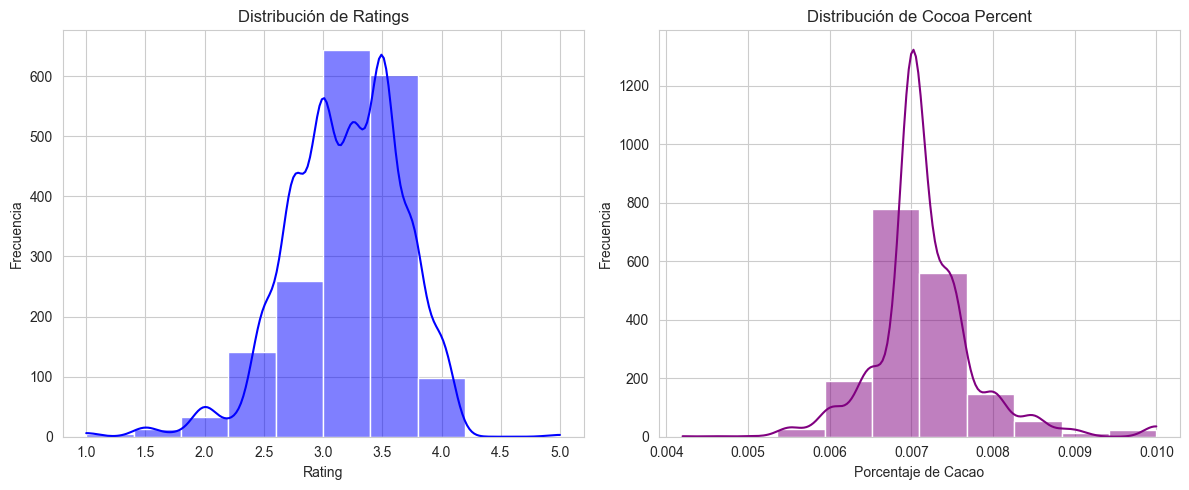

In [16]:
## Histogramas de "Rating" y "cacao_percent"
sns.set_style("whitegrid")

# Crear subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(cacao["rating"], bins=10, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribución de Ratings")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frecuencia")

sns.histplot(cacao["cocoa_percent"], bins=10, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Distribución de Cocoa Percent")
axes[1].set_xlabel("Porcentaje de Cacao")
axes[1].set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()


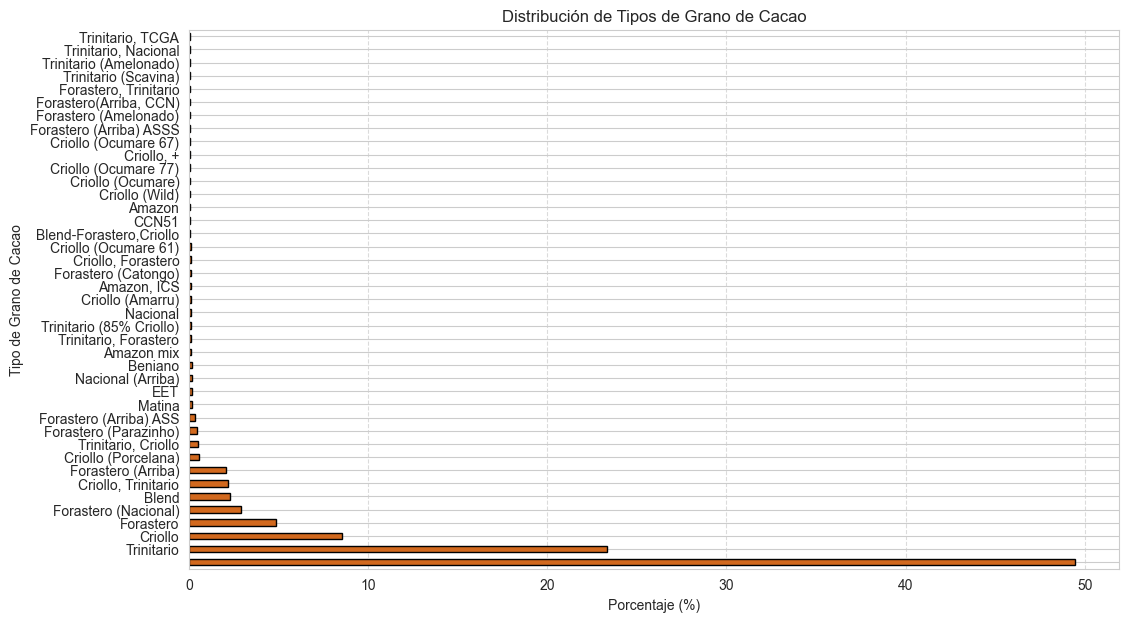

In [18]:
#Grafico donde se muestra la distribución del tipo de grano de cacao
bean_type_counts = cacao["bean_type"].value_counts(normalize=True) * 100


plt.figure(figsize=(12, 7))
bean_type_counts.plot(kind="barh", color="chocolate", edgecolor="black")

# Etiquetas
plt.xlabel("Porcentaje (%)")
plt.ylabel("Tipo de Grano de Cacao")
plt.title("Distribución de Tipos de Grano de Cacao")
plt.grid(axis="x", linestyle="--", alpha=0.7)



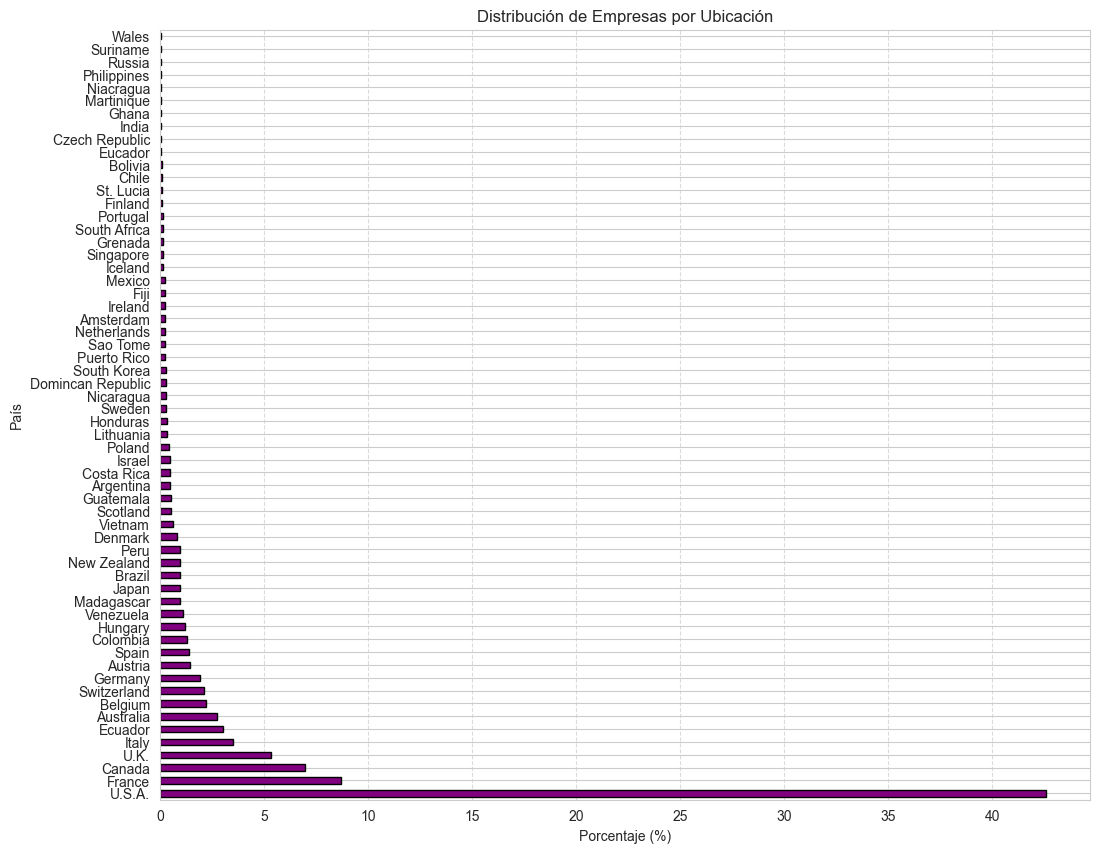

In [20]:
##Grafico dondo se muestra la cantidad de empresas por ubicación geografíca
company_locat = cacao["company_location"].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 10))
company_locat.plot(kind="barh", color="purple", edgecolor="black")


plt.xlabel("Porcentaje (%)")
plt.ylabel("País")
plt.title("Distribución de Empresas por Ubicación")
plt.grid(axis="x", linestyle="--", alpha=0.7)



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer


In [22]:
num_vars = ['ref', 'review_date', 'cocoa_percent', 'rating']
cat_vars = ['company_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'company_location', 'bean_type', 'broad_bean_origin']


In [43]:
cacao['review_date'] = pd.to_numeric(cacao['review_date'], errors='coerce')

Procesar variables numéricas asegurando que no tengan valores nulos y estén bien escalados

In [ ]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Imputar valores faltantes con la media
    ("scaler", StandardScaler())  
])

Procesar variables categóricas que no tienen un orden como los nombres de empresas, países o tipo de grano 

In [42]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Rellenar con la categoría más común
    ("encoder", OneHotEncoder(handle_unknown='ignore', sparse_output=False))  #Convierte a variables dummy
])

In [43]:
#Aplicando diferentes transformaciones a diferentes tipos de columnas
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_vars),
    ("cat", cat_pipeline, cat_vars)
])
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ref', 'review_date', 'cocoa_percent',
                                  'rating']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['company_(maker-if_known)',
                                  'specific_bean_origin_or_bar_name',
                                  'company_location', 'bean_type',
                                  'broad_bean_origin'])])

In [44]:
first_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
]).set_output(transform="pandas")

In [ ]:
# Aplicar el pipeline a los datos
cacao_transformed = first_pipeline.fit_transform(cacao)

 Extrae los nombres de las nuevas columnas generadas por el one-hot encoding.
✅ Une los nombres de las columnas numéricas con los categóricos transformados.
✅ Convierte la matriz transformada en un DataFrame con nombres adecuados.

In [47]:
# Convertir a DataFrame con nombres de columnas
cat_names = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(cat_vars)
column_names = num_vars + list(cat_names)
cacao_transformed = pd.DataFrame(cacao_transformed, columns=column_names)

In [60]:
#Guardando un archivo CSV para un análisis posterior 
cacao_transformed.to_csv("cacao_procesado.csv", index=False)

In [61]:
print("Preprocesamiento completado y guardado en cacao_procesado.csv")

Preprocesamiento completado y guardado en cacao_procesado.csv
